# Heart Disease Classifier – Final Project

In [3]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

## 1. Data Loading & Cleaning

Our dataset (https://archive.ics.uci.edu/dataset/45/heart+disease) have 14 features, two of which (ca and thal) have missing values. We checked the dataset and found that 6 rows contain missing values. From here we have two main options to make the dataset usable.

1. **Exclude the 6 incomplete rows:** This is simple and safe. The dataset contains 303 rows, so removing 6 will reduce the size to roughly 98% which most likely wont affect the performance a lot. However, this solution assumes that the missing data have no correlation to the other values.
2. **Fill the missing data using the mean or mode:** For numerical features (like ca), the mean can be used. And for categorical features (like thal), the mode can be used
3. **Predict the missing values:** We could also try to predict the values using regression or KNN

**Our choice:** We choose the first option since it keeps the cleaning process simple and avoids inacurrate assumptions that could affect our results.P

In [6]:
# Load the data
df = pd.read_csv("./heart+disease/processed.cleveland.data", header=None, na_values="?")

# Add column names (from the 14 features)
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

# Check for missing values
print(df.isna().sum())

# Drop all the rows that are incomplete
df_clean = df.dropna()

print(f"Original size: {len(df)} rows")
print(f"After dropping missing: {len(df_clean)} rows")
# 6 rows dropped. Seems to check out!

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Original size: 303 rows
After dropping missing: 297 rows


## 2. Exploratory Data Analysis (EDA)

First, we'll take a look at all the features to see what are numerical and what are categorical. The infromation for the data set says that all of the values are transfered to numerical which is good! But for the PCA and GMM in 3.

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


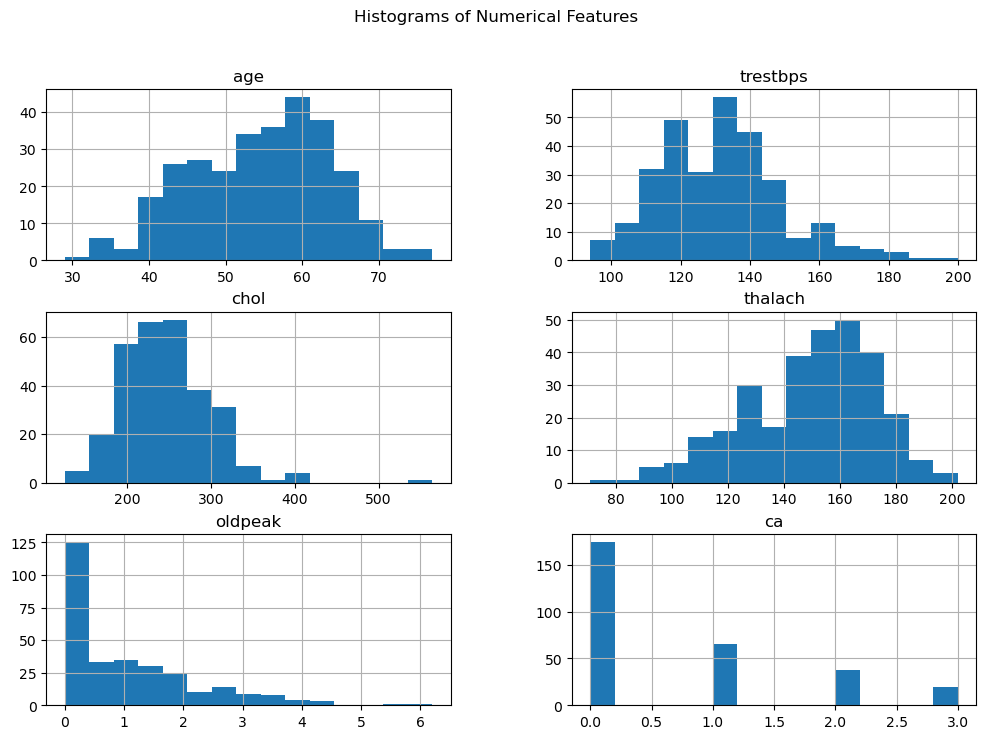

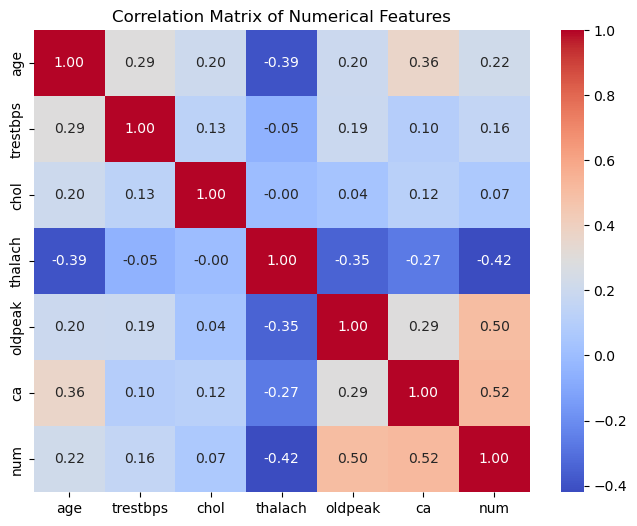

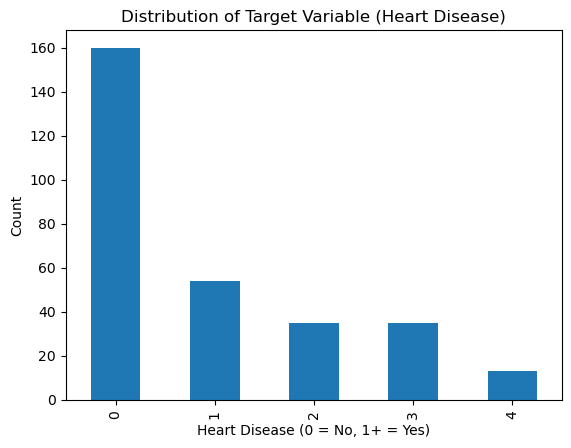

In [9]:
# Preview the first few rows
print(df_clean.head())

# Check data types
print(df_clean.dtypes)

# All the numerical features
numerical_features = [ "age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num" ]
X_numerical = df_clean[numerical_features]
X_unsupervised = X_numerical.drop(columns="num")

# We dont want the labeldata for the unsupervised learning.
X_unsupervised.hist(bins=15, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(X_numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

df_clean["num"].value_counts().plot(kind="bar")
plt.title("Distribution of Target Variable (Heart Disease)")
plt.xlabel("Heart Disease (0 = No, 1+ = Yes)")
plt.ylabel("Count")
plt.show()

## 3. Unsupervised Learning: PCA + GMM

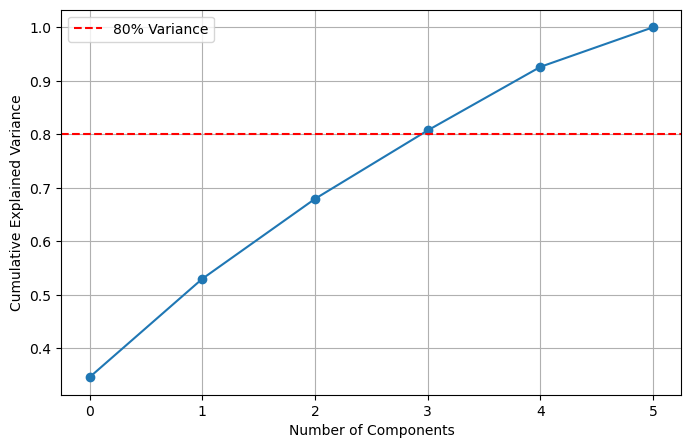

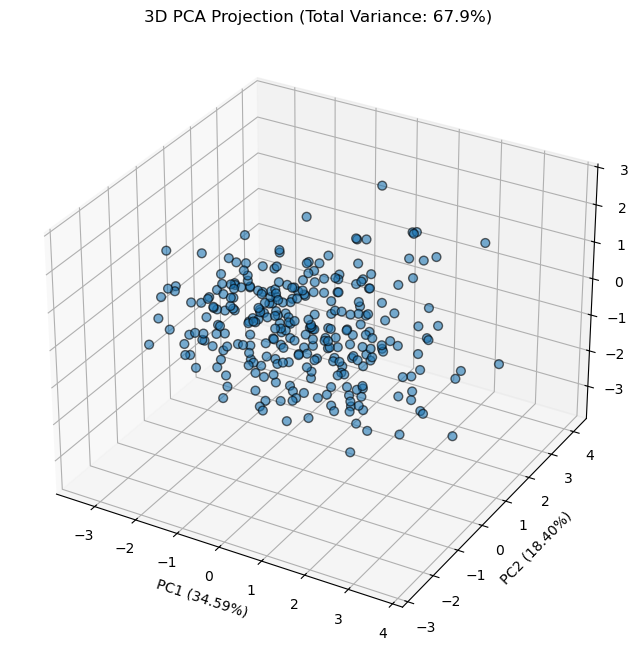

C:\Users\eriks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


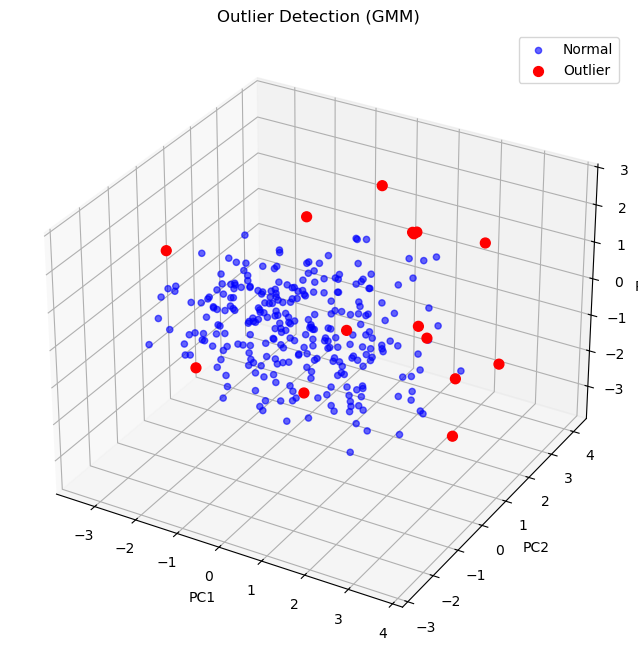


Outlier Distribution:
is_outlier
0    282
1     15
Name: count, dtype: int64

Outlier Percentage: 5.05%

Outlier Statistics:
             age    trestbps        chol     thalach    oldpeak         ca  \
count  15.000000   15.000000   15.000000   15.000000  15.000000  15.000000   
mean   57.600000  151.933333  294.600000  150.066667   2.193333   0.933333   
std    10.966182   31.058624  107.014552   26.714006   2.122151   1.222799   
min    29.000000  102.000000  164.000000  109.000000   0.000000   0.000000   
25%    54.500000  130.000000  210.500000  139.000000   0.250000   0.000000   
50%    60.000000  150.000000  283.000000  154.000000   1.600000   0.000000   
75%    64.500000  179.000000  323.500000  160.000000   4.000000   1.500000   
max    70.000000  200.000000  564.000000  202.000000   6.200000   3.000000   

       is_outlier  
count        15.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max        

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# 1. Data Preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

# 2. PCA Analysis
# Plot explained variance
pca = PCA().fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.grid(True)
plt.legend()
plt.show()

# 3. Dimensionality Reduction (3 components)
k = 3  # Using 3 components as they explain >80% variance
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

# 4. Visualize PCA Projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
    alpha=0.6, 
    edgecolor='k',
    s=40
)
ax.set_xlabel("PC1 (%.2f%%)" % (pca.explained_variance_ratio_[0]*100))
ax.set_ylabel("PC2 (%.2f%%)" % (pca.explained_variance_ratio_[1]*100))
ax.set_zlabel("PC3 (%.2f%%)" % (pca.explained_variance_ratio_[2]*100))
ax.set_title("3D PCA Projection (Total Variance: %.1f%%)" % 
             (sum(pca.explained_variance_ratio_)*100))
plt.show()

# 5. Outlier Detection with GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_pca)

# Get probabilities and identify outliers
log_probs = gmm.score_samples(X_pca)
threshold = np.quantile(log_probs, 0.05)  # Bottom 5% as outliers
outliers = log_probs < threshold

# 6. Visualize Outliers
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points
ax.scatter(
    X_pca[~outliers, 0], X_pca[~outliers, 1], X_pca[~outliers, 2],
    c='blue', alpha=0.6, label='Normal'
)

# Plot outliers
ax.scatter(
    X_pca[outliers, 0], X_pca[outliers, 1], X_pca[outliers, 2],
    c='red', alpha=1, label='Outlier', s=50
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Outlier Detection (GMM)")
ax.legend()
plt.show()

# 7. Create Outlier Feature
# Convert numpy array to pandas Series with original index
outlier_feature = pd.Series(outliers, index=X_unsupervised.index, name='is_outlier')

# Add to original dataset (ensuring no SettingWithCopyWarning)
X_unsupervised = X_unsupervised.copy()
X_unsupervised['is_outlier'] = outlier_feature.astype(int)

# 8. Analyze Results
print("\nOutlier Distribution:")
print(X_unsupervised['is_outlier'].value_counts())
print(f"\nOutlier Percentage: {outliers.mean():.2%}")

print("\nOutlier Statistics:")
print(X_unsupervised[X_unsupervised['is_outlier'] == 1].describe())

print("\nNormal Point Statistics:")
print(X_unsupervised[X_unsupervised['is_outlier'] == 0].describe())

## 4. Supervised Learning: SVM, Random Forest, KNN, Linear Regression

In [60]:
"""function taken from lab 3"""
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    """taken from https://gist.github.com/zachguo/10296432"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth

    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t\p" + (columnwidth-3)//2 * " "

    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES

    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")

    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\eriks\AppData\Local\Temp\ipykernel_37572\124186628.py:9: SyntaxWarning: invalid escape sequence '\p'
  fst_empty_cell = (columnwidth-3)//2 * " " + "t\p" + (columnwidth-3)//2 * " "


In [88]:
supervised_models = {}

def supervised_learning(X_train, X_test, y_train, y_test):
    # makes distances more equal
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    
    
    
    k_values = range(1, 41)
    cv_scores = []
    train_scores = []
    test_scores = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Fit using training data
        knn.fit(X_train_scaled, y_train)
    
        # Accuracy from training data
        train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
        train_scores.append(train_acc)
        
        # Accuracy from test data
        test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
        test_scores.append(test_acc)
        
        # Cross-validation accuracy 5-fold, (WE MIGHT WANT TO TEST cv TOO!!!)
        cv_acc = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
        cv_scores.append(cv_acc)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, train_scores, label='Train Accuracy', marker='o')
    plt.plot(k_values, cv_scores, label='Cross-Validation Accuracy', marker='o')
    plt.plot(k_values, test_scores, label='Test Accuracy', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy depending on k')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print best k
    print(f"KNN best k based on cross-validation: {k_values[np.argmax(cv_scores)]} (Accuracy: {max(cv_scores):.4f})")
    print(f"KNN best k based on training and test data: {k_values[np.argmax(train_scores)], k_values[np.argmax(test_scores)]} (Accuracy: {max(train_scores), max(test_scores)}) \n\n")
    knn_best_k = [k_values[np.argmax(cv_scores)], k_values[np.argmax(test_scores)]]
    
    n_estimators_range = range(10, 110, 5)  # 10 to 200 in steps of 10
    train_scores_rf = []
    test_scores_rf = []
    cv_scores_rf = []
    
    for n in n_estimators_range:
        rf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
        
        # Fit using training data
        rf.fit(X_train, y_train)
    
        # Accuracy from training data
        train_acc = accuracy_score(y_train, rf.predict(X_train))
        train_scores_rf.append(train_acc)
        
        # Accuracy from test data
        test_acc = accuracy_score(y_test, rf.predict(X_test))
        test_scores_rf.append(test_acc)
        
        # Cross-validation accuracy (5-fold)
        cv_acc = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()
        cv_scores_rf.append(cv_acc)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores_rf, label='Train Accuracy', marker='o')
    plt.plot(n_estimators_range, cv_scores_rf, label='Cross-Validation Accuracy', marker='o')
    plt.plot(n_estimators_range, test_scores_rf, label='Test Accuracy', marker='o')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Accuracy vs. n_estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print best n_estimators
    print(f"Best n_estimators based on cross-validation: {n_estimators_range[np.argmax(cv_scores_rf)]} (Accuracy: {max(cv_scores_rf):.4f})")
    print(f"Best n_estimators from training and test data: "
          f"{n_estimators_range[np.argmax(train_scores_rf)], n_estimators_range[np.argmax(test_scores_rf)]} "
          f"(Accuracy: {max(train_scores_rf), max(test_scores_rf)})")
    rf_best_n = [n_estimators_range[np.argmax(cv_scores_rf)], n_estimators_range[np.argmax(test_scores_rf)]]
    
    accuracy_scores = {}
    
    # KNN (cross validation based k)
    knn_model = KNeighborsClassifier(n_neighbors=knn_best_k[0])
    
    # Train the model, predict from test data
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)
    
    # Evaluate performance
    accuracy_scores["KNN (CV)"] = accuracy_score(y_test, y_pred_knn)
    print("KNN (CV) Accuracy:", accuracy_scores["KNN (CV)"])
    print_cm(confusion_matrix(y_test, y_pred_knn), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
    print(classification_report(y_test, y_pred_knn))
    
    # KNN (test based k)
    knn_model = KNeighborsClassifier(n_neighbors=knn_best_k[1])
    
    # Train the model, predict from test data
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)
    
    # Evaluate performance
    accuracy_scores["KNN (test)"] = accuracy_score(y_test, y_pred_knn)
    print("KNN (test) Accuracy:", accuracy_scores["KNN (test)"])
    print_cm(confusion_matrix(y_test, y_pred_knn), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
    print(classification_report(y_test, y_pred_knn))
    
    
    # SVM
    svm_model = SVC(kernel='linear', random_state=42) # we can use rbf but it requires an extra parameter C to first evaluate (ADD LATER!!!)
    
    # Train the model, predict from test data
    svm_model.fit(X_train_scaled, y_train)
    y_pred_svm = svm_model.predict(X_test_scaled)
    
    # Evaluate performance
    accuracy_scores["SVM"] = accuracy_score(y_test, y_pred_svm)
    print("SVM Accuracy:", accuracy_scores["SVM"])
    print_cm(confusion_matrix(y_test, y_pred_svm), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
    print(classification_report(y_test, y_pred_svm))
    
    
    
    # Random forest (CV based n)
    rf_model = RandomForestClassifier(n_estimators=rf_best_n[0], max_depth=5, random_state=42)
    
    # Train the model, predict from test data
    rf_model.fit(X_train_scaled, y_train)
    y_pred_rf = rf_model.predict(X_test_scaled)
    
    # Evaluate performance
    accuracy_scores["Random Forest (CV)"] = accuracy_score(y_test, y_pred_rf)
    print("Random Forest Accuracy:", accuracy_scores["Random Forest (CV)"])
    print_cm(confusion_matrix(y_test, y_pred_rf), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
    print(classification_report(y_test, y_pred_rf))
    
    # Random forest (test based n)
    rf_model = RandomForestClassifier(n_estimators=rf_best_n[1], max_depth=5, random_state=42)
    
    # Train the model, predict from test data
    rf_model.fit(X_train_scaled, y_train)
    y_pred_rf = rf_model.predict(X_test_scaled)

    # Evaluate performance
    accuracy_scores["Random Forest (test)"] = accuracy_score(y_test, y_pred_rf)
    print("Random Forest Accuracy:", accuracy_scores["Random Forest (test)"])
    print_cm(confusion_matrix(y_test, y_pred_rf), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
    print(classification_report(y_test, y_pred_rf))
    
    # Logistic regression
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    
    # Train the model, predict from test data
    lr_model.fit(X_train_scaled, y_train)
    y_pred_lr = lr_model.predict(X_test_scaled)
    
    # Evaluate performance
    accuracy_scores["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)
    print("Logistic Regression Accuracy:", accuracy_scores["Logistic Regression"])
    print_cm(confusion_matrix(y_test, y_pred_lr), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
    print(classification_report(y_test, y_pred_lr))
    
    print(f"Best model: {max(accuracy_scores, key=accuracy_scores.get)}, at accuracy {accuracy_scores[max(accuracy_scores, key=accuracy_scores.get)]:.4f}")
    print(accuracy_scores)

    ratio = X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])
    supervised_models[ratio] = accuracy_scores


Final Feature Set Shape: (297, 19)
Train/Test Split Sizes: (178, 19) (119, 19)


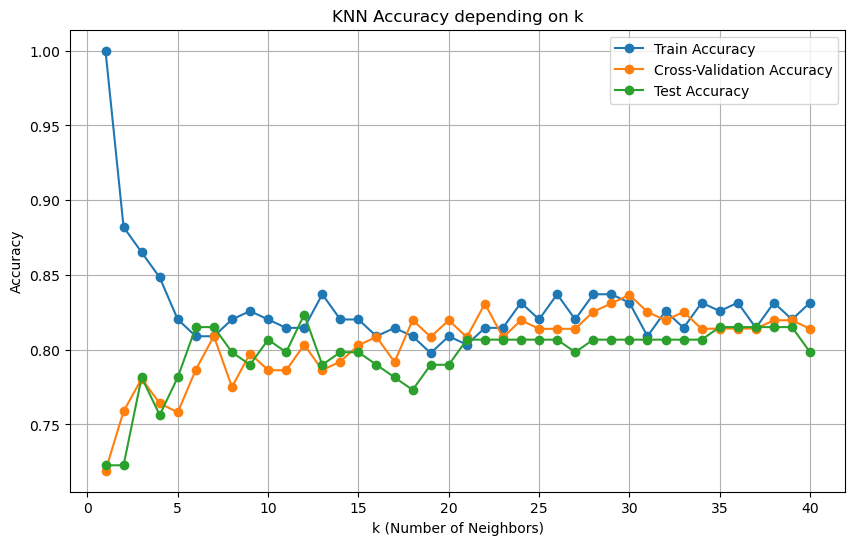

KNN best k based on cross-validation: 30 (Accuracy: 0.8367)
KNN best k based on training and test data: (1, 12) (Accuracy: (1.0, 0.8235294117647058)) 




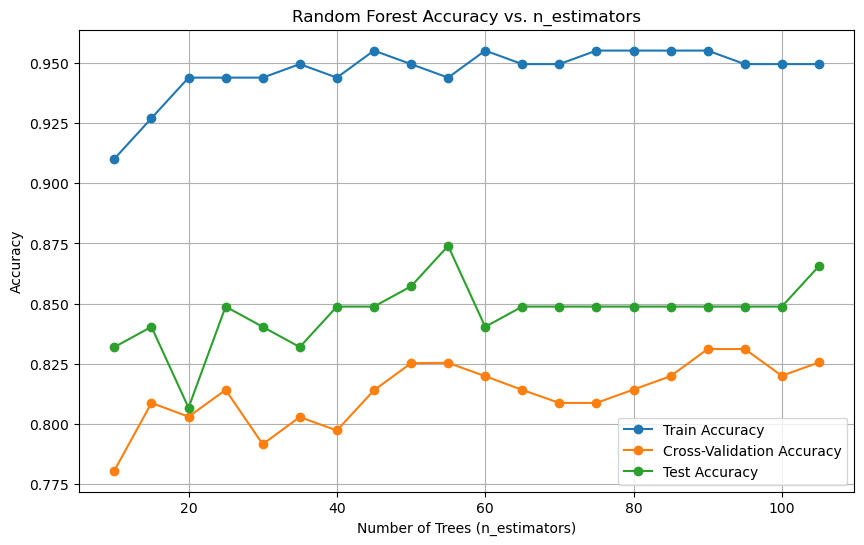

Best n_estimators based on cross-validation: 90 (Accuracy: 0.8311)
Best n_estimators from training and test data: (45, 55) (Accuracy: (0.9550561797752809, 0.8739495798319328))
KNN (CV) Accuracy: 0.8067226890756303
          t\p         0: problems 1: no problems 
       0: problems          53.00          11.00 
    1: no problems          12.00          43.00 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        64
           1       0.80      0.78      0.79        55

    accuracy                           0.81       119
   macro avg       0.81      0.80      0.81       119
weighted avg       0.81      0.81      0.81       119

KNN (test) Accuracy: 0.8235294117647058
          t\p         0: problems 1: no problems 
       0: problems          56.00           8.00 
    1: no problems          13.00          42.00 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
          

In [90]:
# CODE WITH OUTLIERS, SPLIT 60/40
df_clean = df_clean.copy()
df_clean['is_outlier'] = X_unsupervised['is_outlier']
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
df_final = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

X = df_final.drop(columns=["num"])
y = (df_final["num"] > 0).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.4,
    random_state=42,
    stratify=y
)
print("\nFinal Feature Set Shape:", X.shape)
print("Train/Test Split Sizes:", X_train.shape, X_test.shape)

### from sklearn.model_selection import GridSearchCV this might be worth using
supervised_learning(X_train, X_test, y_train, y_test)


Final Feature Set Shape: (297, 19)
Train/Test Split Sizes: (178, 19) (119, 19)


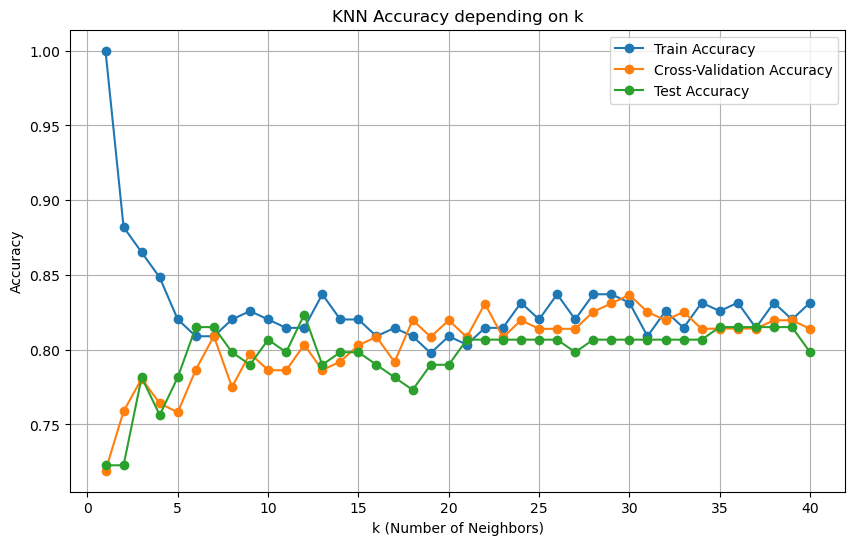

KNN best k based on cross-validation: 30 (Accuracy: 0.8367)
KNN best k based on training and test data: (1, 12) (Accuracy: (1.0, 0.8235294117647058)) 




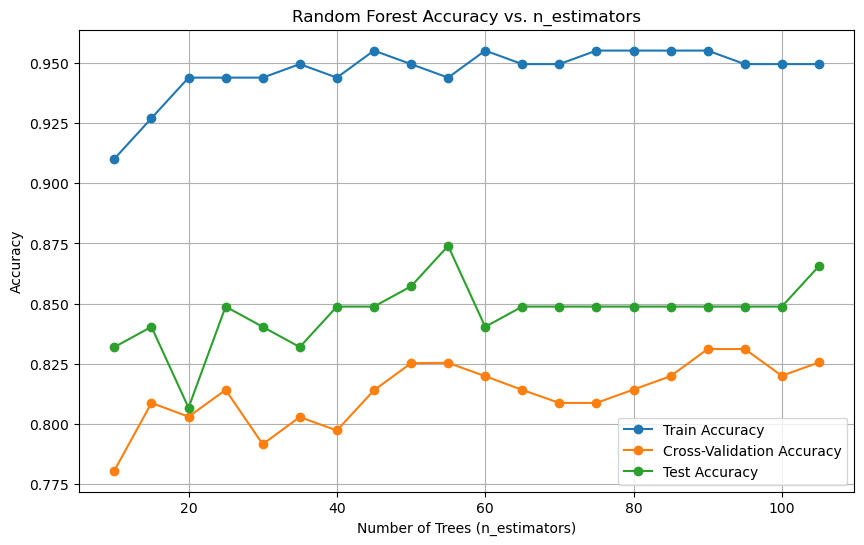

Best n_estimators based on cross-validation: 90 (Accuracy: 0.8311)
Best n_estimators from training and test data: (45, 55) (Accuracy: (0.9550561797752809, 0.8739495798319328))
KNN (CV) Accuracy: 0.8067226890756303
          t\p         0: problems 1: no problems 
       0: problems          53.00          11.00 
    1: no problems          12.00          43.00 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        64
           1       0.80      0.78      0.79        55

    accuracy                           0.81       119
   macro avg       0.81      0.80      0.81       119
weighted avg       0.81      0.81      0.81       119

KNN (test) Accuracy: 0.8235294117647058
          t\p         0: problems 1: no problems 
       0: problems          56.00           8.00 
    1: no problems          13.00          42.00 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
          

In [91]:
# CODE WITHOUT OUTLIERS, SPLIT 60/40
df_clean = df_clean.copy()
df_clean['is_outlier'] = X_unsupervised['is_outlier']
X = df_clean.drop(columns=["is_outlier"]) # no outliers
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
df_final = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

X = df_final.drop(columns=["num"])
y = (df_final["num"] > 0).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.4,
    random_state=42,
    stratify=y
)
print("\nFinal Feature Set Shape:", X.shape)
print("Train/Test Split Sizes:", X_train.shape, X_test.shape)

### from sklearn.model_selection import GridSearchCV this might be worth using
supervised_learning(X_train, X_test, y_train, y_test)


Final Feature Set Shape: (297, 19)
Train/Test Split Sizes: (237, 19) (60, 19)


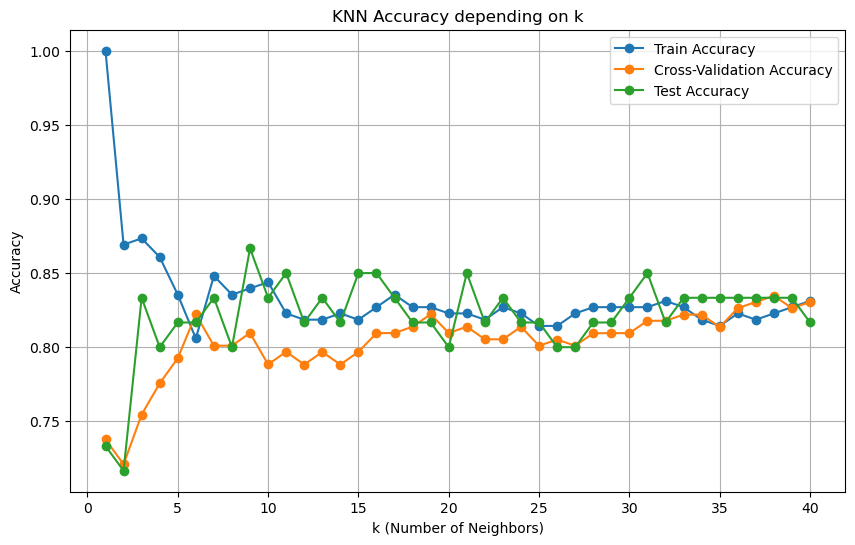

KNN best k based on cross-validation: 38 (Accuracy: 0.8347)
KNN best k based on training and test data: (1, 9) (Accuracy: (1.0, 0.8666666666666667)) 




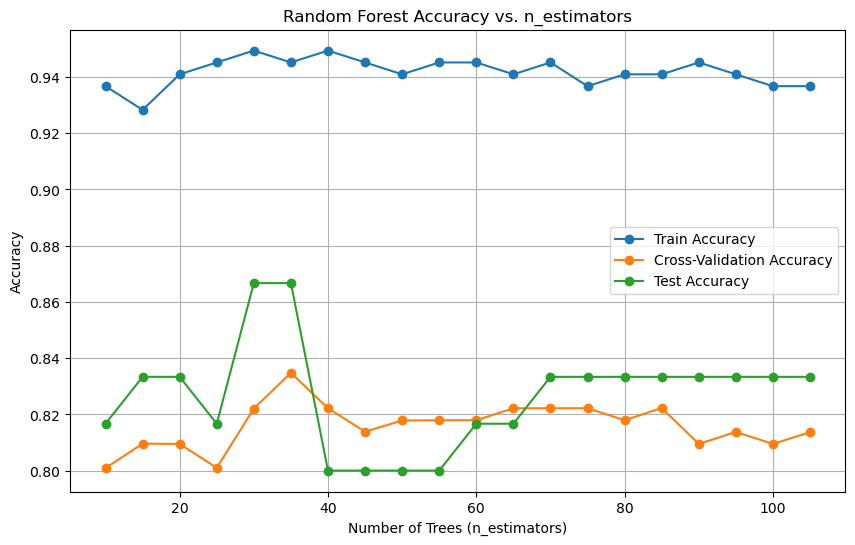

Best n_estimators based on cross-validation: 35 (Accuracy: 0.8348)
Best n_estimators from training and test data: (30, 30) (Accuracy: (0.9493670886075949, 0.8666666666666667))
KNN (CV) Accuracy: 0.8333333333333334
          t\p         0: problems 1: no problems 
       0: problems          28.00           4.00 
    1: no problems           6.00          22.00 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

KNN (test) Accuracy: 0.8666666666666667
          t\p         0: problems 1: no problems 
       0: problems          28.00           4.00 
    1: no problems           4.00          24.00 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
          

In [92]:
# CODE WITH OUTLIERS, SPLIT 80/20
df_clean = df_clean.copy()
df_clean['is_outlier'] = X_unsupervised['is_outlier']
#X = df_clean.drop(columns=["is_outlier"]) # commment this out to test without outliers
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
df_final = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

X = df_final.drop(columns=["num"])
y = (df_final["num"] > 0).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("\nFinal Feature Set Shape:", X.shape)
print("Train/Test Split Sizes:", X_train.shape, X_test.shape)

### from sklearn.model_selection import GridSearchCV this might be worth using
supervised_learning(X_train, X_test, y_train, y_test)


Final Feature Set Shape: (297, 19)
Train/Test Split Sizes: (237, 19) (60, 19)


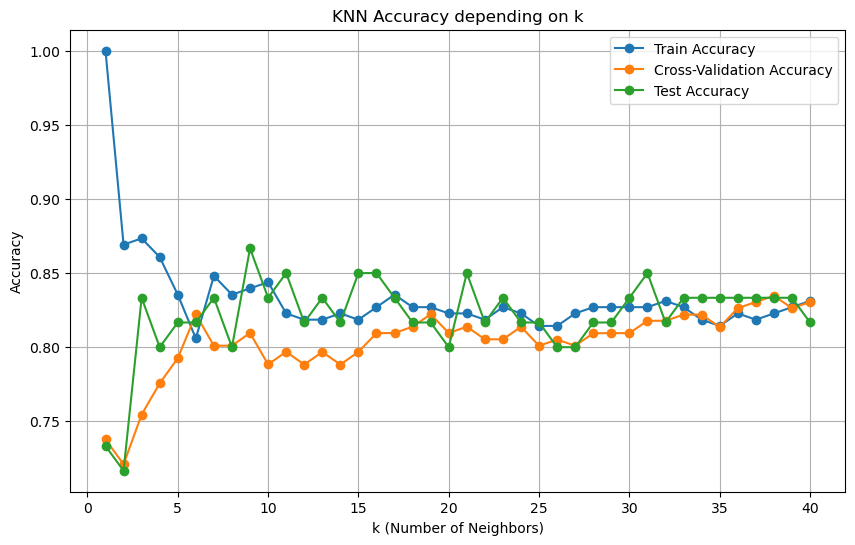

KNN best k based on cross-validation: 38 (Accuracy: 0.8347)
KNN best k based on training and test data: (1, 9) (Accuracy: (1.0, 0.8666666666666667)) 




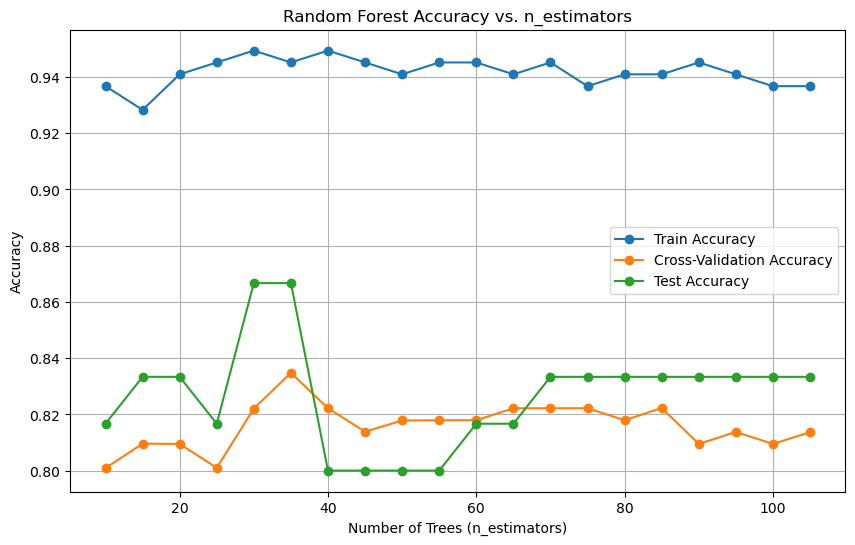

Best n_estimators based on cross-validation: 35 (Accuracy: 0.8348)
Best n_estimators from training and test data: (30, 30) (Accuracy: (0.9493670886075949, 0.8666666666666667))
KNN (CV) Accuracy: 0.8333333333333334
          t\p         0: problems 1: no problems 
       0: problems          28.00           4.00 
    1: no problems           6.00          22.00 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

KNN (test) Accuracy: 0.8666666666666667
          t\p         0: problems 1: no problems 
       0: problems          28.00           4.00 
    1: no problems           4.00          24.00 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
          

In [93]:
# CODE WITHOUT OUTLIERS, SPLIT 80/20
df_clean = df_clean.copy()
df_clean['is_outlier'] = X_unsupervised['is_outlier']
X = df_clean.drop(columns=["is_outlier"]) # no outliers
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
df_final = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

X = df_final.drop(columns=["num"])
y = (df_final["num"] > 0).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("\nFinal Feature Set Shape:", X.shape)
print("Train/Test Split Sizes:", X_train.shape, X_test.shape)

### from sklearn.model_selection import GridSearchCV this might be worth using
supervised_learning(X_train, X_test, y_train, y_test)

## 5. Feature Selection & Feature Importance

best ratio 0.20202020202020202
best model accuracy at ratio Random Forest (CV) 0.8833333333333333
thalach: 0.1214
ca: 0.1168
oldpeak: 0.1046
cp_4.0: 0.1001
age: 0.0945
thal_7.0: 0.0921
chol: 0.0855
trestbps: 0.0796
exang_1.0: 0.0418
slope_2.0: 0.0379


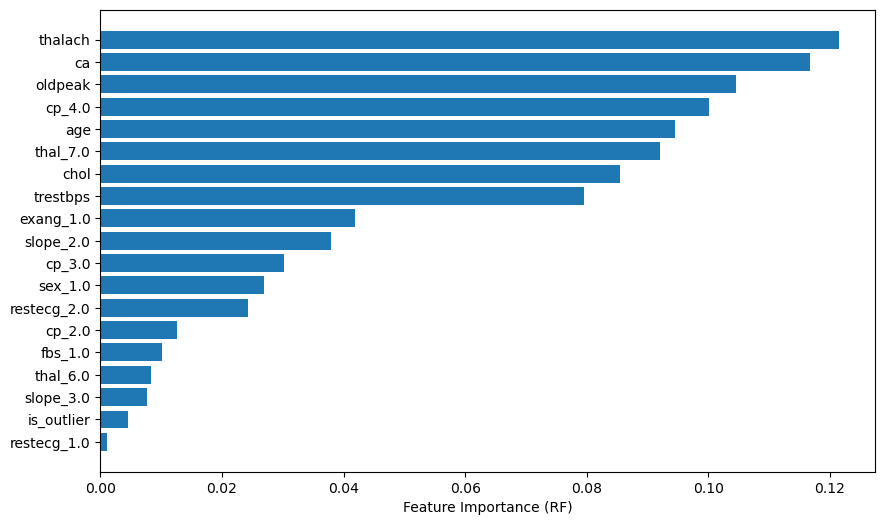

thalach: 0.1917
thal_7.0: 0.0000
thal_6.0: 0.0000
oldpeak: 0.0000
ca: 0.0000
is_outlier: 0.0000
sex_1.0: 0.0000
cp_2.0: 0.0000
cp_3.0: 0.0000
cp_4.0: 0.0000


thalach: 0.1467
thal_7.0: 0.0000
thal_6.0: 0.0000
is_outlier: 0.0000
sex_1.0: 0.0000
cp_2.0: 0.0000
cp_3.0: 0.0000
restecg_1.0: 0.0000
exang_1.0: 0.0000
slope_2.0: 0.0000


Top weights:
 ca             0.912524
cp_4.0         0.818351
thal_7.0       0.791415
sex_1.0        0.549414
slope_2.0      0.498374
oldpeak        0.456913
trestbps       0.433646
restecg_2.0    0.286525
chol           0.280208
exang_1.0      0.262086
dtype: float64


In [115]:
# prints the best split and model from all tests
best_split = max(supervised_models, key=lambda model: max(supervised_models[model].values()))
print("best ratio", best_model)
best_model = max(supervised_models[best_split], key=supervised_models[best_split].get)
best_accuracy = supervised_models[best_split][best_model]
print("best model accuracy at ratio", best_model, best_accuracy)
### namn?



rf = RandomForestClassifier(random_state=42) ### vi måste pröva med rätt indata
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X_train.columns
features_df = pd.DataFrame({'Feature': features, 'Importance': importances})
features_df = feat_df.sort_values(by='Importance', ascending=False)

for i, row in features_df.head(10).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")
    
# Plot
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel("Feature Importance (RF)")
plt.gca().invert_yaxis()
plt.show()

from sklearn.inspection import permutation_importance

model = SVC()
model.fit(X_train, y_train)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Show top features
sorted_idx = result.importances_mean.argsort()[::-1]
for idx in sorted_idx[:10]:
    print(f"{X_train.columns[idx]}: {result.importances_mean[idx]:.4f}")
print("\n")

model = KNeighborsClassifier()
model.fit(X_train, y_train)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Show top features
sorted_idx = result.importances_mean.argsort()[::-1]
for idx in sorted_idx[:10]:
    print(f"{X_train.columns[idx]}: {result.importances_mean[idx]:.4f}")
print("\n")

importance = pd.Series(lr_model.coef_[0], index=X_train.columns)
print("Top weights:\n", importance.sort_values(key=abs, ascending=False).head(10))

## 6. Evaluation: Accuracy, F1, Confusion Matrix


## 7. Conclusions & Discussion